In [1]:
'''Primera parte: Creacion del Data Frame'''
import numpy as np
import pandas as pd


# Generador de numeros aleatorios
random_generator = np.random.default_rng()

'''
n_features almacena los inputs totales o muestras que la data contiene,
n_values, los values que CADA feature contiene
Dicho de otra forma:
n_features: No. de filas (o muestras) en el conjunto de datos.
n_values: No. de columnas (o características) en el conjunto de datos.

Generamos features y weights.
Ambas listas se generaran de forma bidimensional ([[]]).
Weight siempre es unidimensional: cada columna suya corresponde a
una columna entera de todos los features (img 5.0).
Es decir: tienen el mismo largo.

Para trabajar weight como lista unidimensional ([]), accedo al primer indice;
es decir, la primer lista.
Metodo .choice() nos da a elegir en primer argumento (fila),
los numeros aleatorios a generar, y el largo de la lista generada en el segundo
argumento (columna).
Targets tiene el mismo largo de features, porque cada feature
tiene su propio target

Se crea el DataFrame o tabla. Los parametros siguen el formato fila, columna.
Usamos tres columnas por defecto, pero si se quisiera se puede omitir el
sefundo parametro.
Agrego los targets a la derecha del dataframe.
Lo que se hace es crear una nueva columna con ["nombre"], agregar los valores,
y agregarla al DataFrame.
La funcion regresa el DataFrame creado y el array creado en weights.
'''


# Este codigo se importara desde un modulo
def generate_data(n_features, n_values):
    features = random_generator.random((n_features, n_values))
    weights = random_generator.random((1, n_values))[0]
    targets = np.random.choice([0, 1], n_features)
    data = pd.DataFrame(features, columns=["x0", "x1", "x2"])
    data["targets"] = targets
    return data, weights


#                 (fila, columna/ alto, ancho) en data
data, weights = generate_data(4, 3)
'''
Se llama a la función generate_data con 4 filas y 3 columnas.
El resultado de la función (un DataFrame y un array)
se desempaqueta en las variables data y weights.
Resultado Esperado:
Después de ejecutar el código,
data será un DataFrame con 4 filas y 3 columnas (x0, x1, x2)
y una columna adicional targets. Weights será un array de 3 valores.

data contendrá el DataFrame con los datos generados.
weights contendrá el array de pesos generados.
'''

print(data)
print(weights)

         x0        x1        x2  targets
0  0.830973  0.570921  0.173667        0
1  0.496890  0.333671  0.449180        1
2  0.039494  0.567588  0.725037        1
3  0.499474  0.676834  0.429028        1
[0.83394653 0.15192694 0.32450346]


In [2]:
'''Segunda parte:
Weigthed sum function
Select DataFrame row
Remove DataFrame Column
'''

import numpy as np
import pandas as pd
from functions import generate_data


bias = 0.5


# Formula w_sum
def get_weighted_sum(feature, weights, bias):
    return np.dot(feature, weights) + bias
# Multiplica feature * weights. Itera col por col.
# (f[0]*w[0]) + (f[1]*w[1]...) y suma los resultados


data, weights = generate_data(4, 3)

# Select DataFrame row
for i in range(len(data)):
    # Se extraen los valores decada columna en la fila i,
    # excluyendo[:-1] la última columna (targets) (Remove DataFrame Column).
    feature = data.iloc[i][:-1]
    # Se extrae el valor objetivo (targets) de la fila i.
    target = data.iloc[i][-1]
    # encapsulo mi funcion en variable
    w_sum = get_weighted_sum(feature, weights, bias)
    print(w_sum)  # Weighted sum o suma ponderada
    # print(feature * weights)  # Confirmacion manual p/suma ponderada

0.6701482136641534
0.8194434243856845
0.7735375947456729
0.8482628454134642


C:\Users\Dan\AppData\Local\Temp\ipykernel_5836\1411811320.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target = data.iloc[i][-1]


In [6]:
'''Tercera parte:
Sigmoid Activation function
y Cross entropy loss
'''

import numpy as np
import pandas as pd
from functions import generate_data

random_generator = np.random.default_rng()


bias = 0.5
learnrate = 0.1


def get_weighted_sum(feature, weights, bias):
    return np.dot(feature, weights) + bias


# Defino funcion de activacion sigmoid
def sigmoid(w_sum):
    return 1 / (1 + np.exp(-w_sum))  # Prediccion


# Defino Cross entropy loss
def cross_entropy(target, prediction):
    return -(target * np.log10(prediction)+(1-target)*(np.log10(1-prediction)))


data, weights = generate_data(4, 3)

# Cada iteracion recorre un valor a la vez por fila
# Entonces cada variable guarda un valor diferente cada iteracion
for i in range(len(data)):
    feature = data.iloc[i][:-1]
    target = data.iloc[i][-1]
    w_sum = get_weighted_sum(feature, weights, bias)
    prediction = sigmoid(w_sum)
    loss = cross_entropy(target, prediction)
    print(loss)

L 0.4359153062642344
L 0.19226276157276337
L 0.19895054468956366
L 0.19634279354149708


C:\Users\Dan\AppData\Local\Temp\ipykernel_5836\951367351.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target = data.iloc[i][-1]


In [4]:
'''
Cuarta parte: Gradient descent
Actualizacion de pesos y bias
'''

import numpy as np
import pandas as pd
from functions import generate_data

random_generator = np.random.default_rng()


bias = 0.5
learnrate = 0.1


def get_weighted_sum(feature, weights, bias):
    return np.dot(feature, weights) + bias


def sigmoid(w_sum):
    return 1 / (1 + np.exp(-w_sum))


def cross_entropy(target, prediction):
    return -(target * np.log10(prediction)+(1-target)*(np.log10(1-prediction)))


# Actualizo los pesos
def update_weights(target, weights, prediction, learnrate, feature):
    new_weights = []
# Desempaqueto las variables en 'x' y 'w' para iterar en ellas
    for x, w in zip(feature, weights):
        new_w = w + learnrate * (target - prediction) * x
        new_weights.append(new_w)
    return new_weights


# Actualizo el bias
def update_bias(bias, learnrate, target, prediction):
    return bias + learnrate * (target - prediction)


data, weights = generate_data(4, 3)

for i in range(len(data)):
    feature = data.iloc[i][:-1]
    target = data.iloc[i][-1]
    w_sum = get_weighted_sum(feature, weights, bias)
    prediction = sigmoid(w_sum)
    loss = cross_entropy(target, prediction)
    # Gradient descent
    print("OLD WEIGHTS AND BIAS")
    print(weights, bias)
    weights = update_weights(target, weights, prediction, learnrate, feature)
    bias = update_bias(bias, learnrate, target, prediction)
    print("New WEIGHTS AND BIAS")
    # Convierto a float cada i en la lista weights, y cada bias
    weights = [float(weight) for weight in weights]
    bias = float(bias)
    print(weights, bias)

OLD WEIGHTS AND BIAS
[0.28290239 0.46197449 0.75587932] 0.5
New WEIGHTS AND BIAS
[0.2753893505339169, 0.44522555356117455, 0.7377506035836143] 0.4302032152868879
OLD WEIGHTS AND BIAS
[0.2753893505339169, 0.44522555356117455, 0.7377506035836143] 0.4302032152868879
New WEIGHTS AND BIAS
[0.2869104915031407, 0.4593975446666559, 0.746231131855712] 0.4565651810500448
OLD WEIGHTS AND BIAS
[0.2869104915031407, 0.4593975446666559, 0.746231131855712] 0.4565651810500448
New WEIGHTS AND BIAS
[0.3114366594542183, 0.46073480196132827, 0.7512854455211995] 0.48685074949226614
OLD WEIGHTS AND BIAS
[0.3114366594542183, 0.46073480196132827, 0.7512854455211995] 0.48685074949226614
New WEIGHTS AND BIAS
[0.312042012952967, 0.48192451597321045, 0.7602880403295588] 0.5096377331337738


C:\Users\Dan\AppData\Local\Temp\ipykernel_5836\3601732278.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target = data.iloc[i][-1]


In [9]:
'''
Quinta parte: Trainig function
for basic artificial neural network
*Epoch: entre mas cerca al cero, mas cercano a la realidad
'''

import numpy as np
import pandas as pd
from functions import generate_data

random_generator = np.random.default_rng()


bias = 0.5
learnrate = 0.1
# Defino el numero de epoch
epochs = 10
# Defino el epoch loss
epoch_loss = []


def get_weighted_sum(feature, weights, bias):
    return np.dot(feature, weights) + bias


def sigmoid(w_sum):
    return 1 / (1 + np.exp(-w_sum))


def cross_entropy(target, prediction):
    return -(target * np.log10(prediction)+(1-target)*(np.log10(1-prediction)))


def update_weights(target, weights, prediction, learnrate, feature):
    new_weights = []
    for x, w in zip(feature, weights):
        new_w = w + learnrate * (target - prediction) * x
        new_weights.append(new_w)
    return new_weights


def update_bias(bias, learnrate, target, prediction):
    return bias + learnrate * (target - prediction)


data, weights = generate_data(4, 3)


def train_model(data, weights, learnrate, bias, epochs):
    for e in range(epochs):
        individual_loss = []  # Guardo cada loss en una lista
        # Un epoch es una pasada por todo el conjunto de datos
        for i in range(len(data)):
            feature = data.iloc[i][:-1]
            target = data.iloc[i][-1]
            w_sum = get_weighted_sum(feature, weights, bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy(target, prediction)
            individual_loss.append(loss)  # Append cada loss
            # Gradient descent
            weights = update_weights(target, weights, prediction, learnrate, feature)
            bias = update_bias(bias, learnrate, target, prediction)
        # Saco el promedio de loss
        average_loss = sum(individual_loss) / len(individual_loss)
        epoch_loss.append(average_loss)  # Append el avg loss a epoch loss
        print('***************')
        print('epoch', e)
        print(average_loss)


# Llamado a la funcion
train_model(data, weights, learnrate, bias, epochs)

***************
epoch 0
0.3637197076895421
***************
epoch 1
0.34652737311701676
***************
epoch 2
0.33318623477655634
***************
epoch 3
0.32294425039730923
***************
epoch 4
0.3151098733465707
***************
epoch 5
0.30909397727347265
***************
epoch 6
0.3044220970507111
***************
epoch 7
0.30072764322237744
***************
epoch 8
0.2977359183724806
***************
epoch 9
0.2952456719685351


C:\Users\Dan\AppData\Local\Temp\ipykernel_5836\473477228.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target = data.iloc[i][-1]


C:\Users\Dan\AppData\Local\Temp\ipykernel_5836\477802014.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target = data.iloc[i][-1]


***************
epoch 0
0.31879638679962463
***************
epoch 1
0.29823869275393666
***************
epoch 2
0.29714435050504084
***************
epoch 3
0.2957864470850162
***************
epoch 4
0.2945642857912045
***************
epoch 5
0.29353353538980476
***************
epoch 6
0.292671959466556
***************
epoch 7
0.29195238523110584
***************
epoch 8
0.29135124084472774
***************
epoch 9
0.29084886765835766


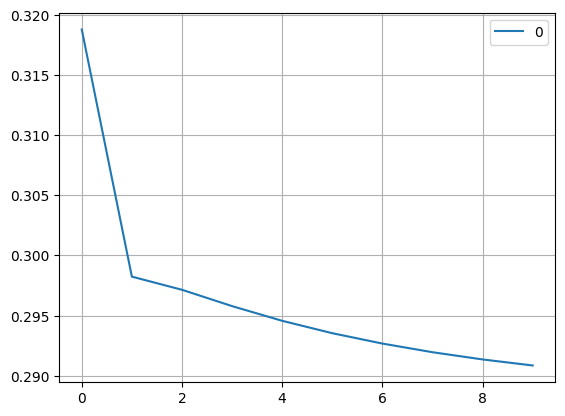

In [19]:
'''
Sexta parte:
Plot the training data
'''

import numpy as np
import pandas as pd
from functions import generate_data

random_generator = np.random.default_rng()


bias = 0.5
learnrate = 0.1
# Defino el numero de epoch
epochs = 10
# Defino el epoch loss
epoch_loss = []


def get_weighted_sum(feature, weights, bias):
    return np.dot(feature, weights) + bias


def sigmoid(w_sum):
    return 1 / (1 + np.exp(-w_sum))


def cross_entropy(target, prediction):
    return -(target * np.log10(prediction)+(1-target)*(np.log10(1-prediction)))


def update_weights(target, weights, prediction, learnrate, feature):
    new_weights = []
    for x, w in zip(feature, weights):
        new_w = w + learnrate * (target - prediction) * x
        new_weights.append(new_w)
    return new_weights


def update_bias(bias, learnrate, target, prediction):
    return bias + learnrate * (target - prediction)


data, weights = generate_data(50, 3)


def train_model(data, weights, learnrate, bias, epochs):
    for e in range(epochs):
        individual_loss = []
        for i in range(len(data)):
            feature = data.iloc[i][:-1]
            target = data.iloc[i][-1]
            w_sum = get_weighted_sum(feature, weights, bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy(target, prediction)
            individual_loss.append(loss)  # Append cada loss
            # Gradient descent
            weights = update_weights(target, weights, prediction, learnrate, feature)
            bias = update_bias(bias, learnrate, target, prediction)
        # Saco el promedio de loss
        average_loss = sum(individual_loss) / len(individual_loss)
        epoch_loss.append(average_loss)  # Append el avg loss a epoch loss
        print('***************')
        print('epoch', e)
        print(average_loss)


# Llamado a la funcion
train_model(data, weights, learnrate, bias, epochs)


# Plot average loss
df = pd.DataFrame(epoch_loss)
df_plot = df.plot(kind='line', grid=True).get_figure()
df_plot.savefig("Training_loss.pdf")

In [ ]:
'''La recta hacia abajo en la grafica
indica que se necesita un menor learn rate
porque estamos perdiendo detalles.
La grafica nos dice que aun hay espacio para usar mas epocs
porque la linea sigue en forma descendente.
Una linea casi horizontal indica una optima utilizacion
del gradient descent, o una menor loss entropy'''